In [1]:
import pandas as pd

# Reemplaza 'nombre_de_tu_archivo.csv' por el nombre real
df = pd.read_csv(r"C:\Users\Diego\Downloads\InvoicePurchases12312016.csv")

# Para ver las primeras filas y confirmar que cargó bien
df.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [6]:
# Convertimos las columnas de fecha a formato datetime para poder analizarlas mejor
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['PODate'] = pd.to_datetime(df['PODate'])
df['PayDate'] = pd.to_datetime(df['PayDate'])

# Mostramos un resumen de los datos
print(df.info())
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      374 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 433.2+ KB
None


Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [10]:
# Contar cuántos ceros hay en cada columna numérica
columnas_numericas = ['Quantity', 'Dollars', 'Freight']
ceros_por_columna = (df[columnas_numericas] == 0).sum()

print("Cantidad de valores en cero:")
print(ceros_por_columna)

Cantidad de valores en cero:
Quantity    0
Dollars     0
Freight     0
dtype: int64


In [8]:
# Ver valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


In [11]:
df['Approval'] = df['Approval'].fillna('No Registrado')

In [12]:
# Revisar si hay valores menores a cero
negativos = df[(df['Dollars'] < 0) | (df['Quantity'] < 0) | (df['Freight'] < 0)]

print(f"Filas con valores negativos: {len(negativos)}")

Filas con valores negativos: 0


In [15]:

# Asegurémonos de que las columnas son fechas (por si no corriste el código anterior)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['PODate'] = pd.to_datetime(df['PODate'])
df['PayDate'] = pd.to_datetime(df['PayDate'])

# 1. Días transcurridos para pagar
df['Dias_Pago'] = (df['PayDate'] - df['InvoiceDate']).dt.days

# 2. Días transcurridos desde la orden hasta la factura
df['Dias_Gestion'] = (df['InvoiceDate'] - df['PODate']).dt.days

# Calculamos los promedios
promedio_pago = df['Dias_Pago'].mean()
promedio_gestion = df['Dias_Gestion'].mean()

print(f"Promedio de días en pagar: {promedio_pago:.2f} días")
print(f"Promedio de días desde orden a factura: {promedio_gestion:.2f} días")


Promedio de días en pagar: 35.47 días
Promedio de días desde orden a factura: 16.42 días


In [16]:
print("Análisis detallado de días de pago:")
print(df['Dias_Pago'].describe())

Análisis detallado de días de pago:
count    5543.000000
mean       35.468519
std         5.842178
min        23.000000
25%        31.000000
50%        35.000000
75%        40.000000
max        48.000000
Name: Dias_Pago, dtype: float64


In [18]:
# Agrupamos por proveedor y vemos sus promedios
analisis_proveedores = df.groupby('VendorName').agg({
    'Dias_Pago': 'mean',
    'Dollars': 'sum',
    'Freight': 'mean'
}).sort_values(by='Dias_Pago', ascending=False)

# Ver los 10 que más tardamos en pagar (posiblemente los que dan más crédito)
analisis_proveedores.head(10)

,Dias_Pago,Dollars,Freight
VendorName,,,
AAPER ALCOHOL & CHEMICAL CO,43.000000,105.07,0.480000
LAUREATE IMPORTS CO,41.000000,140.94,0.720000
UNCORKED,39.714286,2966.31,2.180000
GILMANTON WINERY & VINEYARD,39.500000,5393.04,3.328750
VINEDREA WINES LLC,38.800000,4657.60,1.226500
FLAVOR ESSENCE INC,38.000000,17.00,0.090000
MARTIGNETTI COMPANIES,37.888889,40216.11,7.752593
ALISA CARR BEVERAGES,37.789474,34951.68,9.052632
APPOLO VINEYARDS LLC,37.384615,2399.70,0.944615


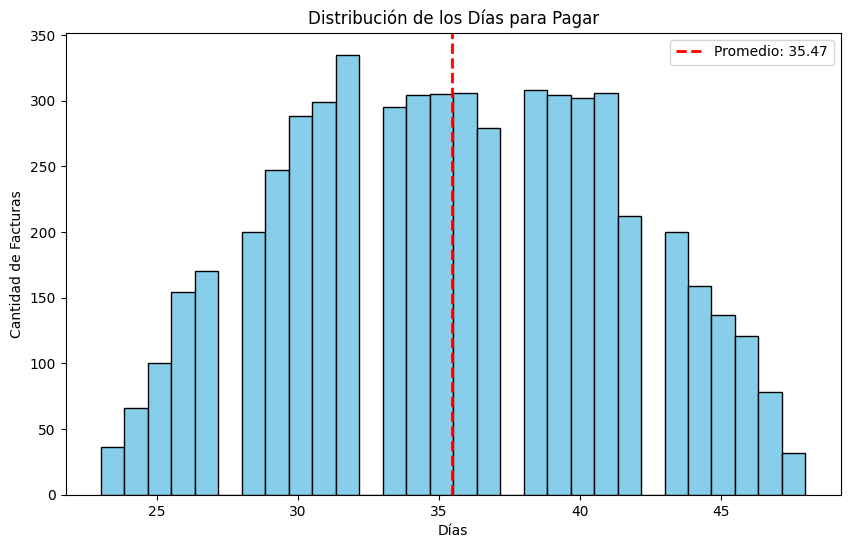

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Dias_Pago'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df['Dias_Pago'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_pago:.2f}')
plt.title('Distribución de los Días para Pagar')
plt.xlabel('Días')
plt.ylabel('Cantidad de Facturas')
plt.legend()
plt.show()

In [19]:
# 1. Calcular el porcentaje de flete sobre el total de la factura
df['Freight_Percent'] = (df['Freight'] / df['Dollars']) * 100

# 2. Ver el top 10 de proveedores con el flete más caro proporcionalmente
# (Filtramos solo los que tienen compras significativas para evitar distorsiones)
flete_por_proveedor = df.groupby('VendorName').agg({
    'Freight_Percent': 'mean',
    'Dollars': 'sum'
}).sort_values(by='Freight_Percent', ascending=False)

print("Proveedores con mayor costo de flete proporcional:")
print(flete_por_proveedor.head(10))

Proveedores con mayor costo de flete proporcional:
                             Freight_Percent    Dollars
VendorName                                             
LAIRD & CO                          0.704833  203011.58
ZORVINO VINEYARDS                   0.695593   86122.71
MARTIGNETTI COMPANIES               0.694109   40216.11
CALEDONIA SPIRITS INC               0.684972  259604.70
KLIN SPIRITS LLC                    0.674783  103484.29
PSP WINES                           0.661267  128895.69
TALL SHIP DISTILLERY LLC            0.656574   48445.58
TAKARA SAKE USA INC                 0.618807   45289.34
PREMIER DISTRIBUTORS                0.617958   84530.87
AMERICAN VINTAGE BEVERAGE           0.601878  156357.28


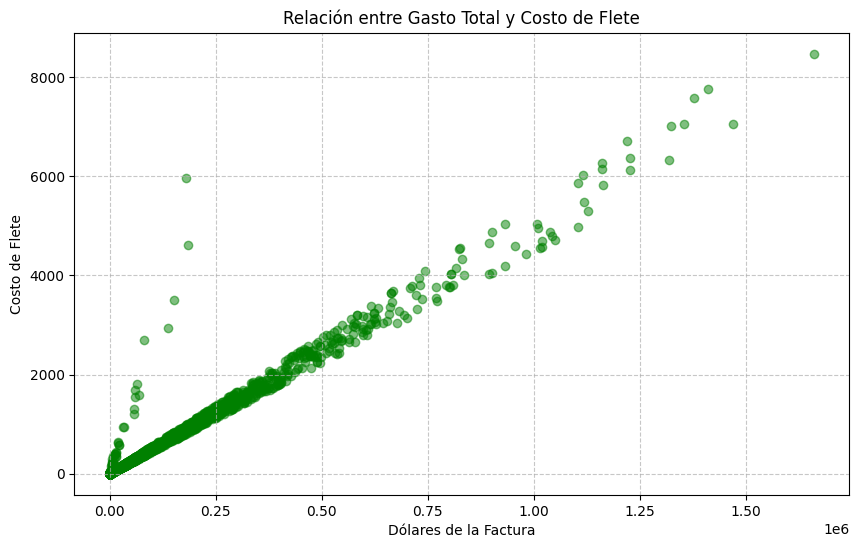

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Dollars'], df['Freight'], alpha=0.5, color='green')
plt.title('Relación entre Gasto Total y Costo de Flete')
plt.xlabel('Dólares de la Factura')
plt.ylabel('Costo de Flete')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

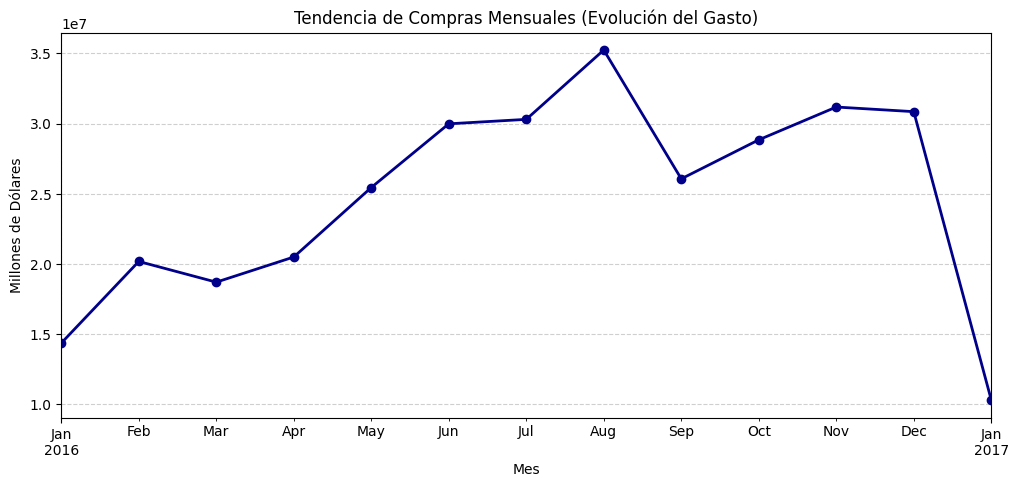

In [21]:
# Extraer el mes y el año para agrupar
df['Mes_Factura'] = df['InvoiceDate'].dt.to_period('M')

# Agrupar por mes y sumar el gasto
gasto_mensual = df.groupby('Mes_Factura')['Dollars'].sum()

# Graficar la tendencia
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
gasto_mensual.plot(kind='line', marker='o', color='darkblue', linewidth=2)
plt.title('Tendencia de Compras Mensuales (Evolución del Gasto)')
plt.xlabel('Mes')
plt.ylabel('Millones de Dólares')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_22884\7286866.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_gasto.values, y=top_10_gasto.index, palette='viridis')


<Figure size 1200x700 with 0 Axes>

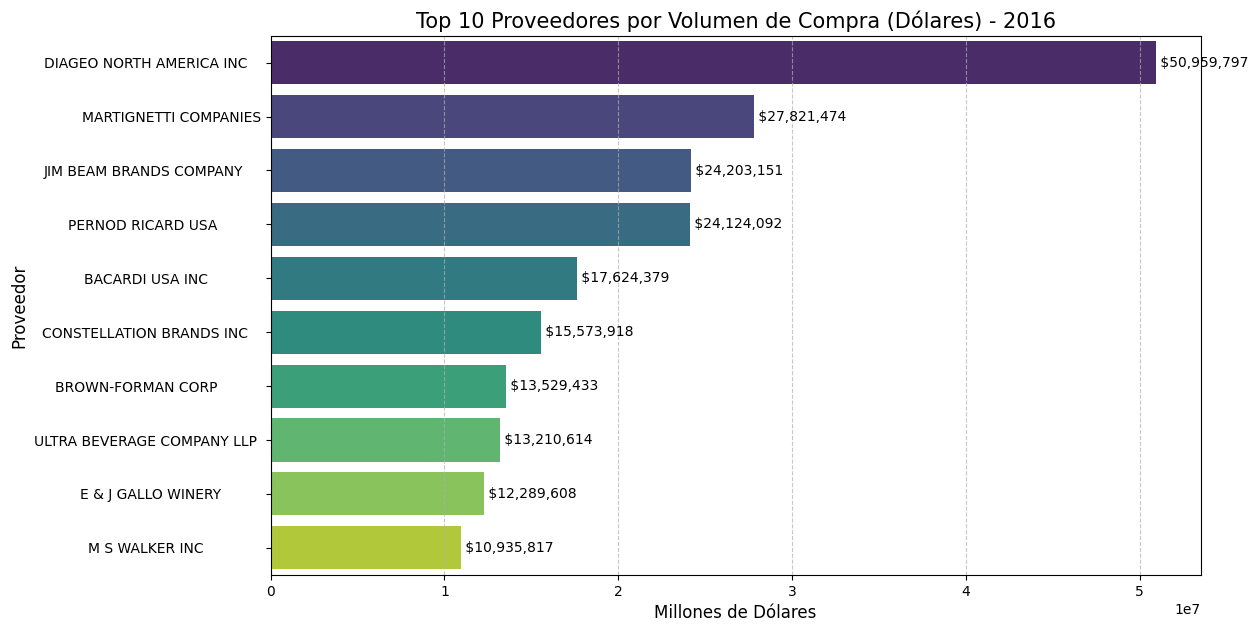

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por proveedor y sumar los dólares
top_10_gasto = df.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10)

# 2. Crear el gráfico
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_gasto.values, y=top_10_gasto.index, palette='viridis')

# 3. Personalización
plt.title('Top 10 Proveedores por Volumen de Compra (Dólares) - 2016', fontsize=15)
plt.xlabel('Millones de Dólares', fontsize=12)
plt.ylabel('Proveedor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en las barras para mayor claridad
for i, v in enumerate(top_10_gasto.values):
    plt.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

plt.show()

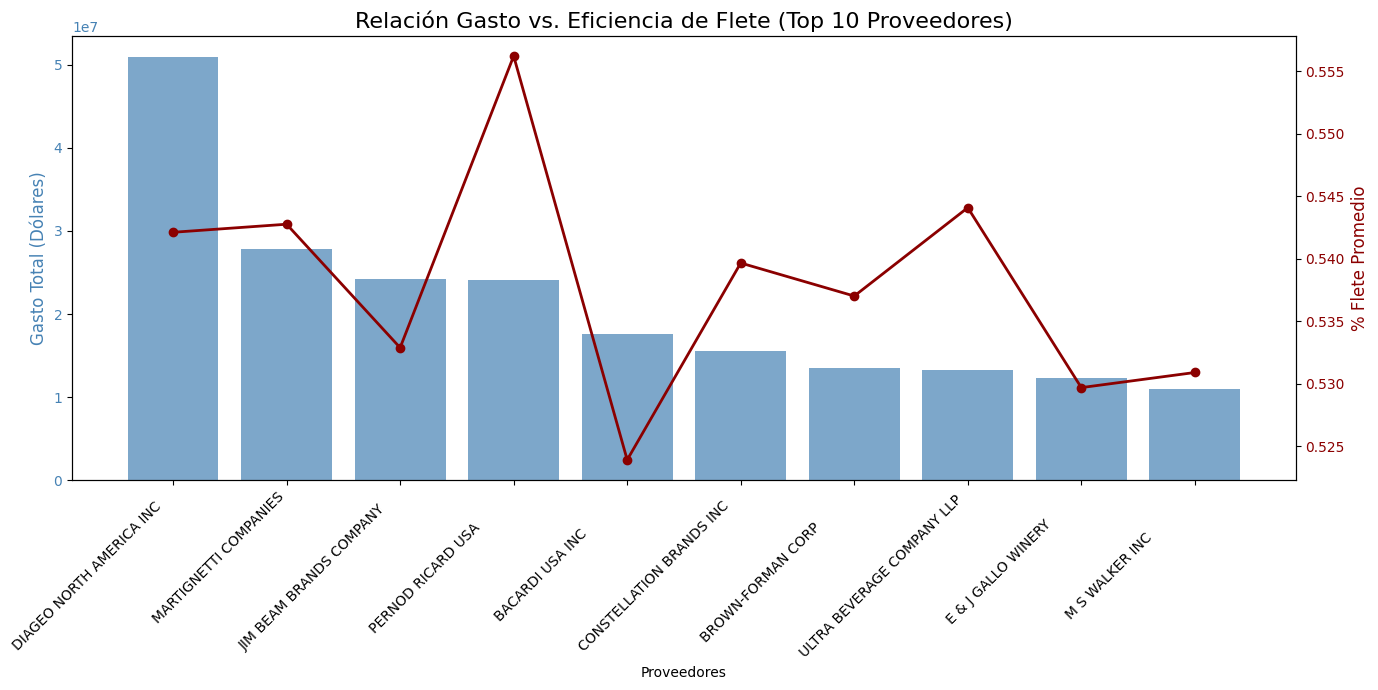

In [25]:
import matplotlib.pyplot as plt

# 1. Agrupamos por los 10 mejores proveedores por gasto
top_10_data = df.groupby('VendorName').agg({
    'Dollars': 'sum',
    'Freight_Percent': 'mean'
}).sort_values(by='Dollars', ascending=False).head(10)

# 2. Crear la figura y el primer eje (Gasto)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras para el Gasto
color_barras = 'steelblue'
ax1.set_xlabel('Proveedores')
ax1.set_ylabel('Gasto Total (Dólares)', color=color_barras, fontsize=12)
ax1.bar(top_10_data.index, top_10_data['Dollars'], color=color_barras, alpha=0.7, label='Gasto Total')
ax1.tick_params(axis='y', labelcolor=color_barras)
plt.xticks(rotation=45, ha='right')

# 3. Crear el segundo eje para el % de Flete
ax2 = ax1.twinx() 
color_puntos = 'darkred'
ax2.set_ylabel('% Flete Promedio', color=color_puntos, fontsize=12)
ax2.plot(top_10_data.index, top_10_data['Freight_Percent'], color=color_puntos, marker='o', linewidth=2, label='% Flete')
ax2.tick_params(axis='y', labelcolor=color_puntos)

# 4. Título y diseño
plt.title('Relación Gasto vs. Eficiencia de Flete (Top 10 Proveedores)', fontsize=16)
fig.tight_layout()
plt.show()

In [27]:
# Guardar el DataFrame actual en un nuevo archivo CSV
df.to_csv('InvoicePurchases_Limpio.csv', index=False)

print("¡Archivo guardado con éxito como 'InvoicePurchases_Limpio.csv'!")

¡Archivo guardado con éxito como 'InvoicePurchases_Limpio.csv'!
